In [82]:
import mat73
import seaborn as sns
import pandas as pd
from scipy.fft import fft, fftfreq
import numpy as np

In [83]:
data_path = "data/downloads/U08_Background.mat"

In [84]:
data_dict = mat73.loadmat(data_path)

In [85]:
data_dict.keys()

dict_keys(['Sig_Mic_bg'])

In [86]:
data_dict['Sig_Mic_bg'].shape

(112, 1443840)

In [87]:
df = pd.DataFrame(data_dict['Sig_Mic_bg'])

In [88]:
df

,0,1,2,3,4,5,6,7,8,9,...,1443830,1443831,1443832,1443833,1443834,1443835,1443836,1443837,1443838,1443839
0,0.052851,0.055908,0.057675,0.051143,0.051495,0.047599,0.040216,0.044000,0.040937,0.039349,...,-0.002262,0.004038,0.007331,0.012285,0.014854,0.010657,0.012957,0.009401,0.001266,0.002940
1,0.044634,0.048781,0.046576,0.041952,0.042514,0.040787,0.042057,0.041566,0.036038,0.038173,...,0.015124,0.009013,0.012511,0.012606,0.005961,0.004077,0.001749,-0.011744,-0.015888,-0.013189
2,0.019449,0.023400,0.025542,0.031055,0.036968,0.037052,0.039269,0.040650,0.035219,0.031417,...,-0.001021,-0.007068,-0.014370,-0.012062,-0.018909,-0.024268,-0.021857,-0.020686,-0.023275,-0.021998
3,0.012293,0.010911,0.011103,0.009547,0.004570,0.006192,0.009663,0.012511,0.016920,0.019623,...,-0.013629,-0.019179,-0.021774,-0.017865,-0.018533,-0.016492,-0.013257,-0.016945,-0.023396,-0.022306
4,0.024495,0.022756,0.023983,0.019590,0.017919,0.019631,0.017534,0.018873,0.015530,0.015039,...,-0.003166,-0.010494,-0.014390,-0.011991,-0.015990,-0.017130,-0.018764,-0.018282,-0.018307,-0.016567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.013667,0.012643,0.008694,0.006353,0.003550,0.001481,0.000303,0.004488,0.010061,0.010911,...,-0.017319,-0.025147,-0.024148,-0.017969,-0.019562,-0.015755,-0.014821,-0.023208,-0.026947,-0.021949
108,0.037017,0.038079,0.042346,0.046313,0.045205,0.044134,0.045819,0.046707,0.045507,0.045350,...,-0.018444,-0.018198,-0.015116,-0.016592,-0.015500,-0.013519,-0.011488,-0.011803,-0.013191,-0.016426
109,0.047156,0.044641,0.043835,0.037847,0.034462,0.031169,0.026485,0.026925,0.024346,0.022261,...,-0.009412,-0.007359,-0.005728,-0.012261,-0.014478,-0.015731,-0.025692,-0.028593,-0.018879,-0.027067
110,0.044810,0.043809,0.050300,0.049768,0.050388,0.053417,0.056885,0.058032,0.058532,0.058918,...,-0.002737,0.001133,0.000250,-0.009277,-0.009871,-0.013800,-0.023145,-0.020583,-0.019521,-0.018512


In [89]:
sample_rate = 48128

# Reduce number of points to plot in heatmap
df_compact = df.iloc[::1,::int(sample_rate/3)]

# Swap sample number for time in seconds
df_compact.columns = df_compact.columns/sample_rate

# Get averaged values for each column
df_mean = pd.DataFrame()
for col in df_compact.columns:
    mean = df_compact[col].mean()
    df_mean[col] = [mean]

df_mean

,0.000000,0.333319,0.666639,0.999958,1.333278,1.666597,1.999917,2.333236,2.666556,2.999875,...,26.998878,27.332197,27.665517,27.998836,28.332156,28.665475,28.998795,29.332114,29.665434,29.998753
0,0.039952,-0.033766,0.011134,0.014807,0.015706,-0.031718,0.010615,-0.030509,-0.010135,0.005881,...,-0.007131,0.033112,-0.008289,-0.034827,-0.017396,0.020023,0.020959,0.021787,-0.029367,0.000097


<AxesSubplot:>

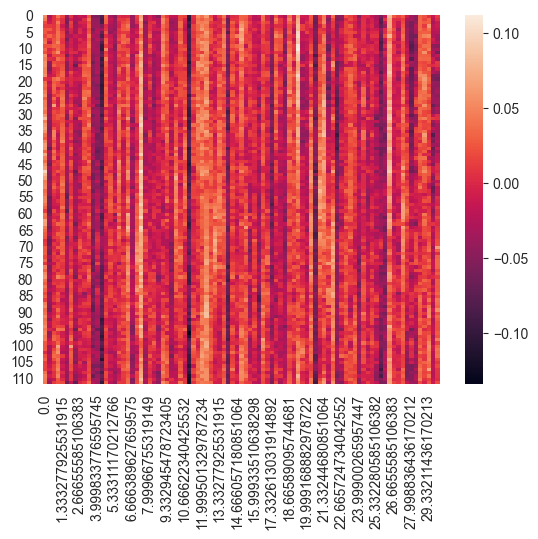

In [90]:
sns.heatmap(df_compact)

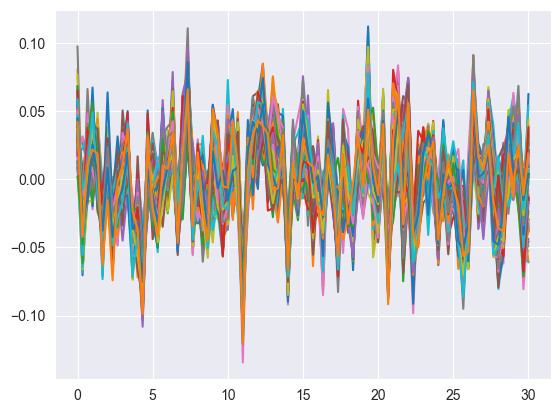

In [91]:
plot_rows = 112 # Each row corresponds to a microphone

for i in range(plot_rows):
    df_ = df_compact.iloc[i,:]
    sns.lineplot(data=df_,
                 x=df_.index,
                 y=df_.values)

<AxesSubplot:>

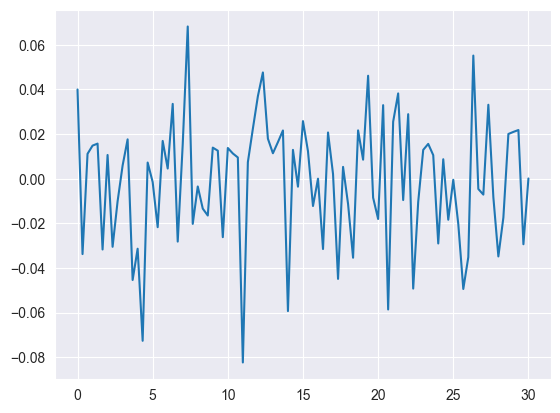

In [92]:
# Plot the mean microphone signal
# df only has 1 row, columns correspond to sample (time)

df_mean = df_mean.iloc[0,:]
sns.lineplot(data=df_mean,
             x=df_mean.index,
             y=df_mean.values)

<AxesSubplot:>

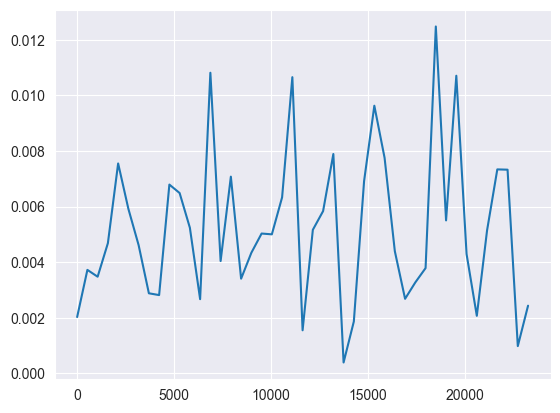

In [100]:
# Perform FFT on df_mean

# Number of sample points
N = df_mean.shape[0]

# sample spacing
T = 1.0 / sample_rate

x = df_mean.index
y = df_mean.values

yf = fft(y)
xf = fftfreq(N, T)[:N//2]

sns.lineplot(x=xf, y=2.0/N * np.abs(yf[0:N//2]))

